<function matplotlib.pyplot.show(*args, **kw)>

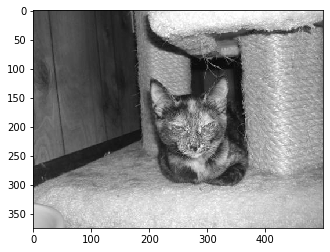

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
DATADIR = "/Users/pawansapkota/Downloads/kagglecatsanddogs_3367a/PetImages" 
CATEGORIES = ["Dog","Cat"]

for category in CATEGORIES:
   path = os.path.join(DATADIR, category)
for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array, cmap='gray')
plt.show




In [2]:
print(img_array)


[[ 72  71  72 ... 209 211 210]
 [ 73  72  72 ... 205 207 207]
 [ 74  73  73 ... 207 203 200]
 ...
 [196 196 196 ... 143 144 145]
 [195 195 195 ... 142 142 143]
 [194 195 195 ... 142 140 141]]


In [3]:
print(img_array.shape)


(375, 500)


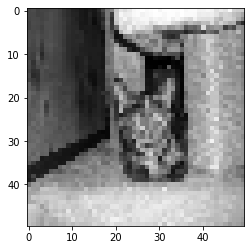

In [4]:
IMG_SIZE = 50
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')

In [5]:
training_data = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
            
            
create_training_data()    


    
    

In [6]:
print(len(training_data))

24946


In [7]:
import random
random.shuffle(training_data)


In [8]:
for sample in training_data[:10]:
    print(sample[1])


1
1
0
0
1
0
1
1
1
1


In [9]:
X = []
y = []

In [10]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
    
    

  


In [11]:
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)  
y = np.array(y)

In [12]:
#import pickle
#pickle_out = open("X.pickle","wb")
#pickle.dump(X, pickle_out)
#pickle_out.close

#import pickle
#pickle_out = open("y.pickle","wb")
#pickle.dump(y, pickle_out)
#pickle_out.close

In [15]:

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import time
os.environ['KMP_DUPLICATE_LIB_OK']='True'
NAME = "Cats_dogs-{}".format(int(time.time()))
tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))

#import pickle

#X = pickle.load(open("X.pickle", "rb"))
#y = pickle.load(open("y.pickle", "rb"))

X = X/255.0

model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=4, validation_split=0.1, callbacks = [tensorboard])
model.save("Cat_and_Dog")

Train on 22451 samples, validate on 2495 samples
Epoch 1/4
22451/22451 [==============================] - 56s 3ms/sample - loss: 0.6931 - acc: 0.4951 - val_loss: 0.6931 - val_acc: 0.5074
Epoch 2/4
22451/22451 [==============================] - 52s 2ms/sample - loss: 0.6931 - acc: 0.4966 - val_loss: 0.6931 - val_acc: 0.4926
Epoch 3/4
22451/22451 [==============================] - 54s 2ms/sample - loss: 0.6931 - acc: 0.4949 - val_loss: 0.6931 - val_acc: 0.4926
Epoch 4/4
22451/22451 [==============================] - 51s 2ms/sample - loss: 0.6931 - acc: 0.4996 - val_loss: 0.6931 - val_acc: 0.4926
